## 使用內建功能讀取 txt 檔

# [教學目標]
- 示範 Pandas 各種 讀取 / 寫入 檔案的方式

# [範例重點]
- 讀取 txt 檔 (In[2], Out[2])
- 存取 json 檔 (In[4], In[5], In[7], In[8])
- 存取 npy 檔 (numpy專用檔, In[10], In[11]) 
- 讀取 Pickle 檔 (In[12], In[13])

In [2]:
with open("data/example.txt", 'r') as f:
    data = f.readlines()
print(data)

['id,sex,age,score\n', '001,F,20,77\n', '002,F,25,90\n', '003,M,22,80\n', '004,F,30,66\n', '005,M,40,60\n', '006,M,29,87\n']


## 將 txt 轉成 pandas dataframe

In [3]:
import pandas as pd

data = []
with open("data/example.txt", 'r') as f:
    for line in f:
        line = line.replace('\n', '').split(',') # 將每句最後的 /n 取代成空值後，再以逗號斷句
        data.append(line)
data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]

In [33]:
df = pd.DataFrame(data[1:])
df.columns = data[0]
df

,id,sex,age,score
0,001,F,20,77
1,002,F,25,90
2,003,M,22,80
3,004,F,30,66
4,005,M,40,60
5,006,M,29,87


## 將資料轉成 json 檔後輸出
將 json 讀回來後，是否與我們原本想要存入的方式一樣? (以 id 為 key)

In [34]:
import json
df.to_json('data/example01.json')

In [35]:
# 上面的存入方式，會將 column name 做為主要的 key, row name 做為次要的 key
with open('data/example01.json', 'r') as f:
    j1 = json.load(f)
j1

{'id': {'0': '001',
  '1': '002',
  '2': '003',
  '3': '004',
  '4': '005',
  '5': '006'},
 'sex': {'0': 'F', '1': 'F', '2': 'M', '3': 'F', '4': 'M', '5': 'M'},
 'age': {'0': '20', '1': '25', '2': '22', '3': '30', '4': '40', '5': '29'},
 'score': {'0': '77', '1': '90', '2': '80', '3': '66', '4': '60', '5': '87'}}

In [36]:
df.set_index('id', inplace=True)
df

,sex,age,score
id,,,
001,F,20,77
002,F,25,90
003,M,22,80
004,F,30,66
005,M,40,60
006,M,29,87


df.set_index('id', inplace=False)，
inplace=False 會另外在建一組id

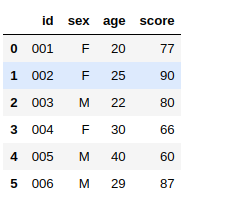

In [40]:
df.to_json('data/example02.json', orient='index')  # 使用index作為to_json的key

In [38]:
with open('data/example02.json', 'r') as f:
    j2 = json.load(f)
j2

{'001': {'sex': 'F', 'age': '20', 'score': '77'},
 '002': {'sex': 'F', 'age': '25', 'score': '90'},
 '003': {'sex': 'M', 'age': '22', 'score': '80'},
 '004': {'sex': 'F', 'age': '30', 'score': '66'},
 '005': {'sex': 'M', 'age': '40', 'score': '60'},
 '006': {'sex': 'M', 'age': '29', 'score': '87'}}

## 將檔案存為 npy 檔
一個專門儲存 numpy array 的檔案格式
使用 npy 通常可以讓你更快讀取資料喔!  
[建議閱讀](https://towardsdatascience.com/why-you-should-start-using-npy-file-more-often-df2a13cc0161)

In [42]:
import numpy as np
# 將 data 的數值部分轉成 numpy array
array = np.array(data[1:])
array

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

In [43]:
np.save(arr=array, file='data/example.npy')

In [44]:
array_back = np.load('data/example.npy')
array_back

array([['001', 'F', '20', '77'],
       ['002', 'F', '25', '90'],
       ['003', 'M', '22', '80'],
       ['004', 'F', '30', '66'],
       ['005', 'M', '40', '60'],
       ['006', 'M', '29', '87']], dtype='<U3')

## Pickle
存成 pickle 檔  
什麼都包，什麼都不奇怪的 [Pickle](https://docs.python.org/3/library/pickle.html)  
比如說 [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) 的資料集就是用 pickle 包的喔!

In [45]:
import pickle
with open('data/example.pkl', 'wb') as f:
    pickle.dump(file=f, obj=data)

In [46]:
with open('data/example.pkl', 'rb') as f:
    pkl_data = pickle.load(f)
pkl_data

[['id', 'sex', 'age', 'score'],
 ['001', 'F', '20', '77'],
 ['002', 'F', '25', '90'],
 ['003', 'M', '22', '80'],
 ['004', 'F', '30', '66'],
 ['005', 'M', '40', '60'],
 ['006', 'M', '29', '87']]